## **FOML EXPERIMENTS (1-10)**

**1. Univariate,Bivariate and Mutivariate**

**Algorithm:**

1️⃣ Load and preview the dataset

2️⃣ Handle missing values

3️⃣ Univariate regression (1 feature → price)

4️⃣ Plot for univariate regression

5️⃣ Bivariate regression (2 features → price)

6️⃣ Plot for bivariate regression

7️⃣ Multivariate regression (multiple features → price)

8️⃣ Train the model

9️⃣ Make predictions

🔟 Evaluate performance (R² score)

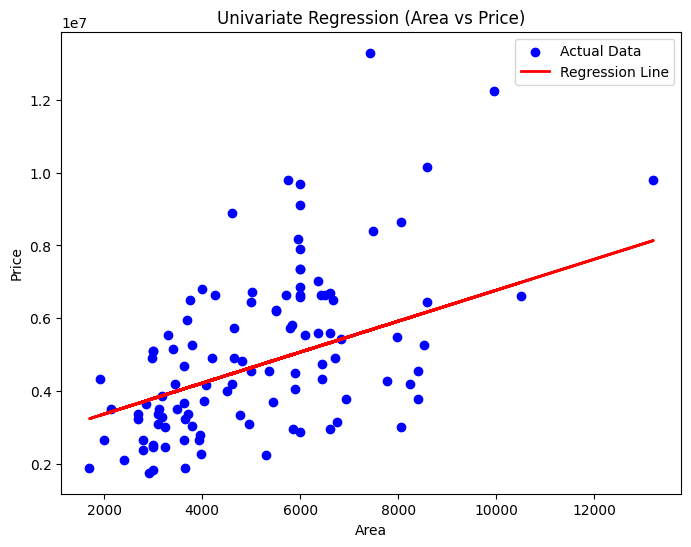

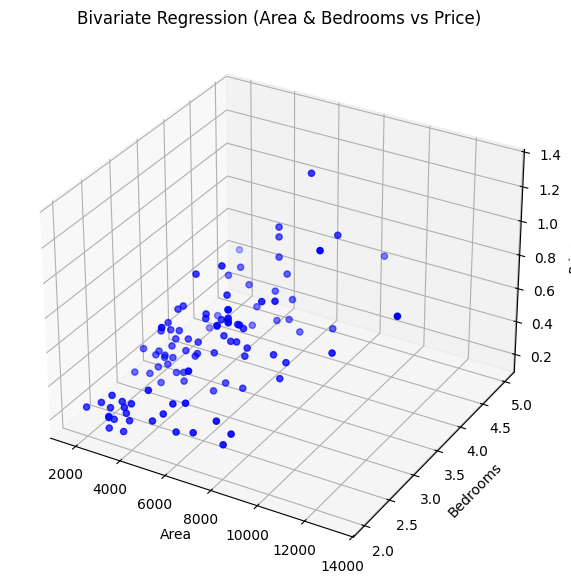

Multivariate Regression R² Score: 0.6495
Multivariate Regression MSE: 1771751116594.04


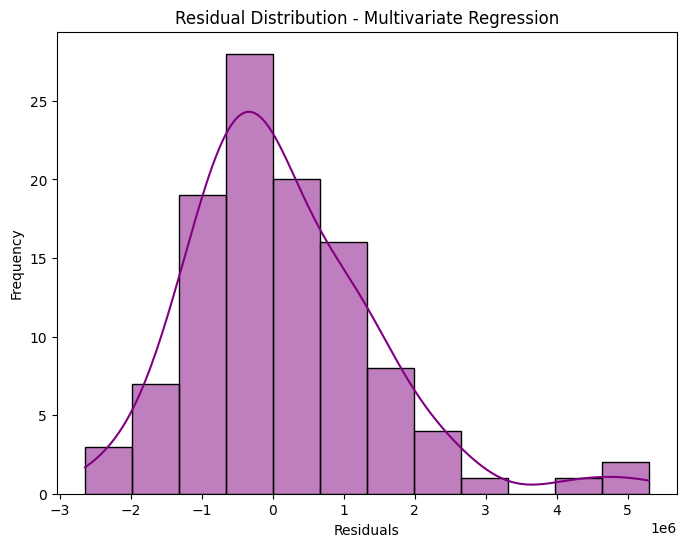

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load dataset
file_path = "/content/Housing.csv"
df = pd.read_csv(file_path)

# Step 2: Preprocess data (convert categorical variables)
le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

# Step 3: Univariate Regression (Price vs Area)
X_uni = df[['area']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X_uni, y, test_size=0.2, random_state=42)
model_uni = LinearRegression()
model_uni.fit(X_train, y_train)
y_pred_uni = model_uni.predict(X_test)

# Plot Univariate Regression
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_uni, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Univariate Regression (Area vs Price)')
plt.legend()
plt.show()

# Step 4: Bivariate Regression (Price vs Area & Bedrooms)
X_bi = df[['area', 'bedrooms']]
X_train, X_test, y_train, y_test = train_test_split(X_bi, y, test_size=0.2, random_state=42)
model_bi = LinearRegression()
model_bi.fit(X_train, y_train)
y_pred_bi = model_bi.predict(X_test)

# Plot Bivariate Regression in 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['area'], X_test['bedrooms'], y_test, color='blue', label='Actual Data')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Bivariate Regression (Area & Bedrooms vs Price)')
plt.show()

# Step 5: Multivariate Regression (Using all features)
X_multi = df.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred_multi)
r2 = r2_score(y_test, y_pred_multi)
print(f"Multivariate Regression R² Score: {r2:.4f}")
print(f"Multivariate Regression MSE: {mse:.2f}")

# Residual Plot
residuals = y_test - y_pred_multi
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution - Multivariate Regression')
plt.show()

**2. Linear Regression using least square**

**Algorithm:**

Step 1: Import necessary libraries (numpy, matplotlib, pandas).

Step 2: Read the dataset (headbrain.csv) and explore data using .head(), .info(), and .describe().

Step 3: Extract Head Size as X (independent variable) and Brain Weight as y (dependent variable).

Step 4: Compute the mean of X and y to prepare for coefficient calculations.

Step 5: Calculate slope (b1) and intercept (b0) using the Least Squares formula.

Step 6: Generate predictions (y_pred) using the linear equation y_pred = b0 + b1 * X.

Step 7: Plot the regression line over the actual data points (X, y).

Step 8: Plot residuals (differences between actual and predicted values) to analyze model fit.

Step 9: Compute the R-squared value, which indicates the proportion of variance explained by the model.

Step 10: Display results (Intercept, Slope, and R² Score) to evaluate model performance.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


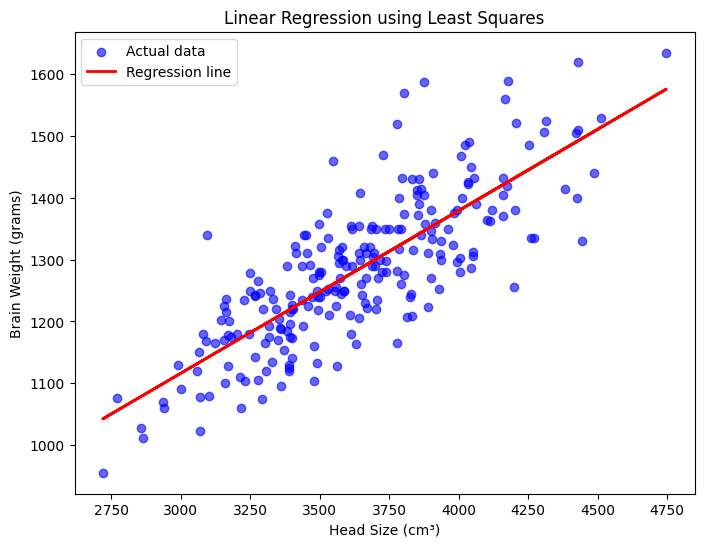

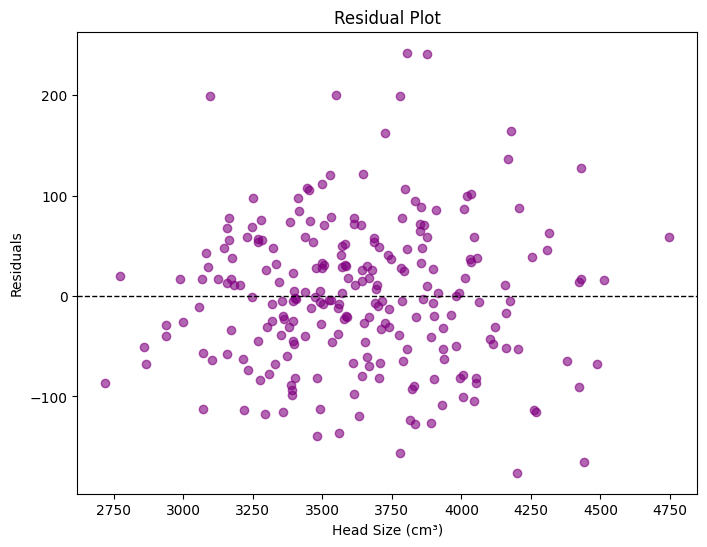

Intercept: 325.57
Slope: 0.26
R-squared Value: 0.6393


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Import necessary libraries

# Step 2: Read the dataset
file_path = "/content/headbrain.csv"
data = pd.read_csv(file_path)

data.head()
data.info()
data.describe()

# Step 3: Prepare the data
X = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

# Step 4: Calculate the mean
mean_x, mean_y = np.mean(X), np.mean(y)

# Step 5: Calculate the coefficients
b1 = np.sum((X - mean_x) * (y - mean_y)) / np.sum((X - mean_x) ** 2)
b0 = mean_y - b1 * mean_x

# Step 6: Make predictions
y_pred = b0 + b1 * X

# Step 7: Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual data', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Regression line', linewidth=2)
plt.xlabel('Head Size (cm³)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.title('Linear Regression using Least Squares')
plt.show()

# Step 8: Plot the residuals
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Head Size (cm³)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Step 9: Calculate the R-squared value
TSS = np.sum((y - mean_y) ** 2)
RSS = np.sum((y - y_pred) ** 2)
R2 = 1 - (RSS / TSS)

# Step 10: Display the results
print(f"Intercept: {b0:.2f}")
print(f"Slope: {b1:.2f}")
print(f"R-squared Value: {R2:.4f}")


**3. Logistic Regession**

**Algorithm:**

Step 1: Import required libraries (numpy, matplotlib, pandas, sklearn).

Step 2: Load the dataset (suv_data.csv) into a pandas DataFrame.

Step 3: Extract Age and Estimated Salary as X (features) and Purchased as y (target variable).

Step 4: Split the data into training (80%) and testing (20%) sets using train_test_split().

Step 5: Apply feature scaling (StandardScaler) to normalize X_train and X_test for better performance.

Step 6: Train the Logistic Regression model using LogisticRegression().fit(X_train, y_train).

Step 7: Make predictions (y_pred) on X_test using model.predict().

Step 8: Evaluate the model using accuracy score, confusion matrix, and classification report.

Step 9: Plot actual data using a scatter plot (Age vs. Estimated Salary, colored by y_test).

Step 10: Plot predicted data using a scatter plot (Age vs. Estimated Salary, colored by y_pred).

Accuracy: 0.9250
Confusion Matrix:
[[57  1]
 [ 5 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



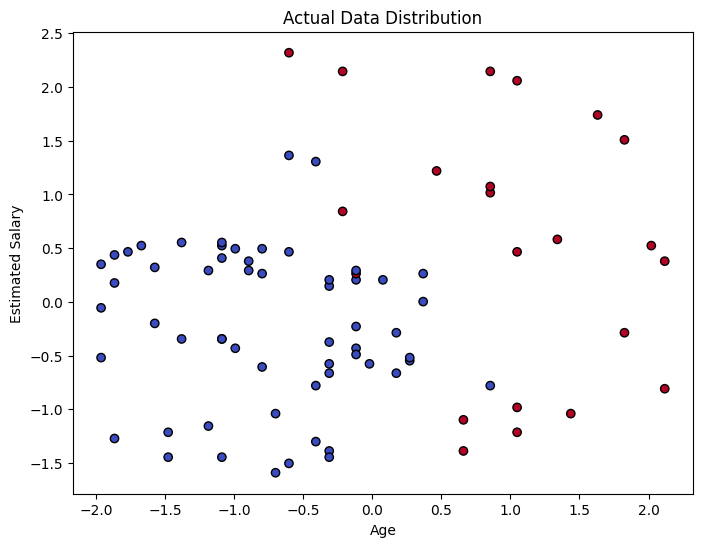

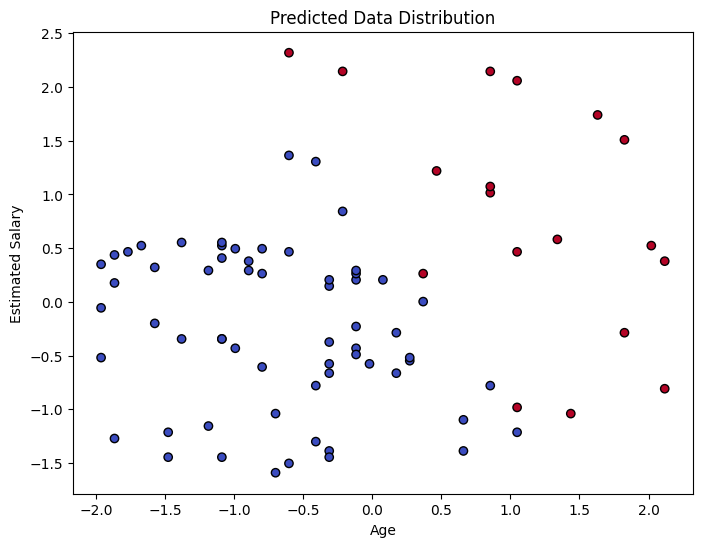

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Read the dataset
file_path = "/content/suv_data.csv"
data = pd.read_csv(file_path)

# Step 3: Prepare the data
X = data[['Age', 'EstimatedSalary']].values  # Independent variables
y = data['Purchased'].values  # Dependent variable

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 5: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Step 9: Simple plots
# Scatter plot of actual data
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Actual Data Distribution')
plt.show()

# Scatter plot of predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Predicted Data Distribution')
plt.show()


**4. Single Layer Perceptron**

**Algorithm:**

Initialize the input data (X) and corresponding labels (y).

Initialize weights and bias randomly.

Define an activation function (e.g., step function).

Set the learning rate (e.g., 0.1).

Compute the weighted sum of inputs (X) and weights (W).

Apply the activation function to get the output.

Calculate the error (difference between expected and predicted output).

Update weights and bias using the Perceptron Learning Rule.

Repeat steps 5-8 for multiple epochs to train the model.

Test the perceptron on new inputs and print predictions.

In [ ]:
import numpy as np

# Step 1: Initialize input features (X) and target labels (y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # AND logic gate output

# Step 2: Initialize weights and bias
weights = np.random.rand(2)
bias = np.random.rand(1)
learning_rate = 0.1

# Step 3: Define activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Step 4: Train the perceptron using the Perceptron Learning Algorithm
epochs = 10
for epoch in range(epochs):
    for i in range(len(X)):
        # Step 5: Compute weighted sum
        weighted_sum = np.dot(X[i], weights) + bias

        # Step 6: Apply activation function
        y_pred = step_function(weighted_sum)

        # Step 7: Compute error
        error = y[i] - y_pred

        # Step 8: Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

# Step 9: Make predictions
for i in range(len(X)):
    output = step_function(np.dot(X[i], weights) + bias)
    print(f"Input: {X[i]}, Predicted Output: {output}")

# Step 10: Final weights and bias
print("Final Weights:", weights)
print("Final Bias:", bias)


Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 1
Final Weights: [0.23942754 0.09998966]
Final Bias: [-0.33008925]


**(OR)**

In [ ]:
import numpy as np

# Activation function (Step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron training function
def perceptron_train(X, y, lr=0.1, epochs=10):
    weights = np.zeros(X.shape[1])  # Initialize weights
    bias = 0  # Initialize bias

    for epoch in range(epochs):
        for i in range(len(X)):
            net_input = np.dot(X[i], weights) + bias
            prediction = step_function(net_input)
            error = y[i] - prediction  # Calculate error

            # Update weights and bias if error exists
            weights += lr * error * X[i]
            bias += lr * error

    return weights, bias

# Perceptron prediction function
def perceptron_predict(X, weights, bias):
    return [step_function(np.dot(x, weights) + bias) for x in X]

# Example dataset (AND logic gate)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
y = np.array([0, 0, 0, 1])  # Output labels (AND gate)

# Train the perceptron
weights, bias = perceptron_train(X, y)

# Test the perceptron
predictions = perceptron_predict(X, weights, bias)

print("Trained Weights:", weights)
print("Trained Bias:", bias)
print("Predictions:", predictions)


Trained Weights: [0.2 0.1]
Trained Bias: -0.20000000000000004
Predictions: [0, 0, 0, 1]


**5. Multilayer Perceptron**

**Algorithm:**

Load the dataset from file (CSV or other formats).

Preprocess the dataset (Handle missing values if any).

Split the dataset into training and testing sets.

Normalize the features using StandardScaler().

Define and train the MLP model with one hidden layer.

Make predictions on the test set.

Evaluate the model using accuracy and confusion matrix.

Test the model with a new sample.

Retrieve final weights and biases of the model.

Visualize the classification results.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the dataset from file
file_path = "/content/BankNote_Authentication.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Step 2: Preprocess the dataset (Check for missing values)
print(data.info())
print(data.describe())

# Step 3: Prepare the data (Assuming last column is 'Class' and rest are features)
X = data.iloc[:, :-1].values  # Features (all columns except last)
y = data.iloc[:, -1].values   # Target (last column)

# Step 4: Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Define the MLP model (1 hidden layer with 10 neurons)
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Step 7: Train the model
mlp.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = mlp.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2%}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Step 10: Test the model with a new sample
new_sample = [[2.5, -1.2, 3.1, -0.8]]  # Replace with actual feature values
new_sample_scaled = scaler.transform(new_sample)
prediction = mlp.predict(new_sample_scaled)
print(f"Predicted Class: {'Forged' if prediction[0] == 1 else 'Genuine'}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None
          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.0000

**(OR)**

**Algorithm:**

1️⃣ Load and preprocess the dataset


2️⃣ Split into training and testing sets


3️⃣ Standardize the features


4️⃣ Define the MLP model


5️⃣ Train the model


6️⃣ Evaluate the model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset
df = pd.read_csv("/content/BankNote_Authentication.csv")

# Split features and labels
X = df.drop(columns=['class'])
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6380 - loss: 0.6991 - val_accuracy: 0.7273 - val_loss: 0.6272
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7612 - loss: 0.5773 - val_accuracy: 0.8618 - val_loss: 0.4662
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8933 - loss: 0.3993 - val_accuracy: 0.9564 - val_loss: 0.2724
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9609 - loss: 0.2292 - val_accuracy: 0.9745 - val_loss: 0.1526
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.1235 - val_accuracy: 0.9855 - val_loss: 0.0983
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9799 - loss: 0.0827 - val_accuracy: 0.9891 - val_loss: 0.0711
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9797 - loss: 0.0629 - val_accuracy: 0.9891 - val_loss: 0.0556
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9815 - loss: 0.0557 - val_accuracy: 0.9891 - val_loss: 0.0460
Epo

**6. Face Recognition**

**Algorithm:**

Step 1: Load the Labeled Faces in the Wild (LFW) dataset.

Step 2: Extract face images (grayscale) and corresponding labels (person names).

Step 3: Flatten 2D face images into 1D feature vectors for processing.

Step 4: Normalize the feature vectors using StandardScaler to improve model performance.

Step 5: Split the dataset into training (80%) and testing (20%) sets.

Step 6: Apply PCA (Principal Component Analysis) to reduce dimensionality to 150 components.

Step 7: Train an SVM (Support Vector Machine) classifier with a linear kernel on the PCA-transformed data.

Step 8: Predict labels for the test set using the trained SVM model.

Step 9: Evaluate model performance using accuracy score and confusion matrix.

Step 10: Display sample predictions with actual vs. predicted labels using matplotlib.

Face Recognition Model Accuracy: 80.23%


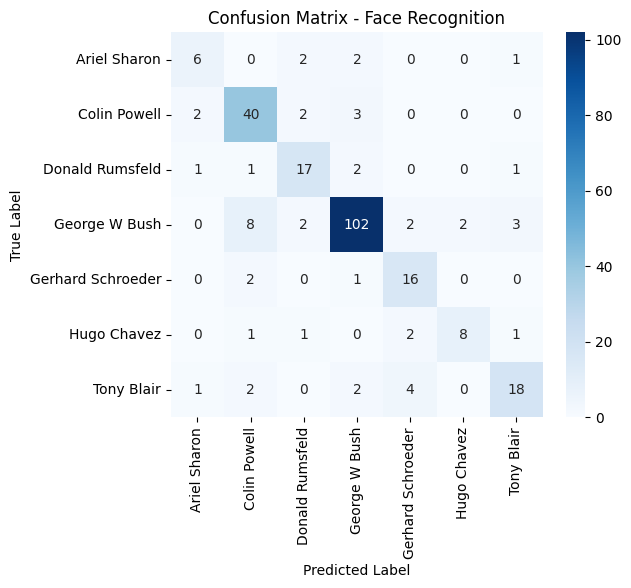

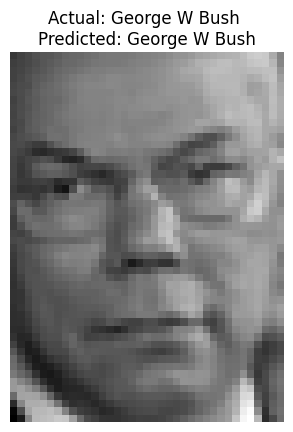

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Labeled Faces in the Wild (LFW) dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.images  # Face images (Gray-scale)
y = lfw_people.target  # Person labels
target_names = lfw_people.target_names  # Names of people

# Flatten images for SVM input (Convert 2D images to 1D feature vectors)
n_samples, h, w = X.shape
X = X.reshape(n_samples, h * w)

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA (Principal Component Analysis) for dimensionality reduction
n_components = 150  # Reduce features to 150 dimensions
pca = PCA(n_components=n_components, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel="linear", class_weight="balanced", probability=True)
svm_classifier.fit(X_train_pca, y_train)

# Test the model
y_pred = svm_classifier.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Face Recognition Model Accuracy: {accuracy * 100:.2f}%")

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Face Recognition")
plt.show()

# Test with a sample image
sample_idx = 5  # Choose any index from test set
plt.imshow(lfw_people.images[sample_idx], cmap="gray")
plt.title(f"Actual: {target_names[y_test[sample_idx]]} \nPredicted: {target_names[y_pred[sample_idx]]}")
plt.axis("off")
plt.show()

**7. Decision Tree**

**Algorithm:**

Step 1: Import necessary libraries (numpy, matplotlib, sklearn).

Step 2: Load the Iris dataset using load_iris() function.

Step 3: Extract features (X) and labels (y) from the dataset.

Step 4: Split the dataset into training (80%) and testing (20%) sets using train_test_split().

Step 5: Initialize the Decision Tree Classifier with a gini criterion and a maximum depth of 3.

Step 6: Train the Decision Tree model on the training dataset using clf.fit(X_train, y_train).

Step 7: Predict the class labels for the test dataset using clf.predict(X_test).

Step 8: Evaluate the model's accuracy using accuracy_score().

Step 9: Print the model's accuracy as a percentage (accuracy * 100).

Step 10: Visualize the trained Decision Tree using plot_tree().

Model Accuracy: 100.00%


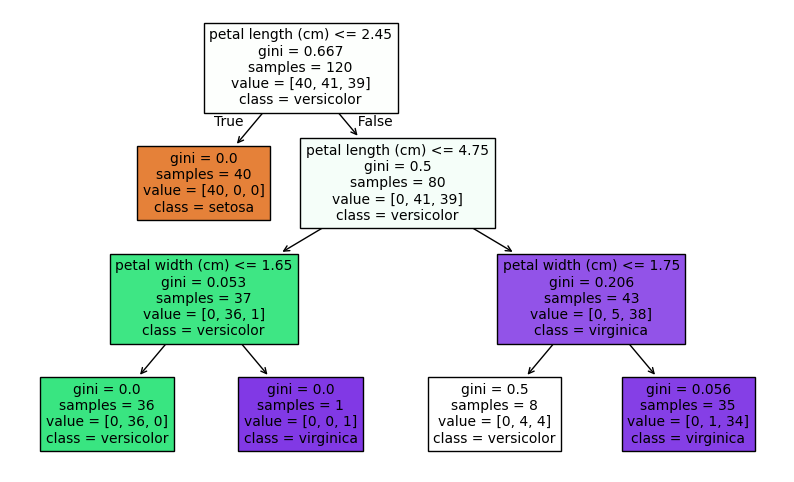

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target  # Features & Labels

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree model
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Visualize the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

**8a. Ada Boost**

**Algorithm:**

Step 1: Import necessary libraries (numpy, matplotlib, sklearn).

Step 2: Load the Iris dataset and extract features (X) and labels (y).

Step 3: Split the dataset into training (80%) and testing (20%) sets using train_test_split().

Step 4: Initialize the AdaBoost Classifier with a Decision Tree (max depth=1) as the base estimator.

Step 5: Train the AdaBoost model on the training dataset and make predictions on the test dataset.

Step 6: Evaluate the model's accuracy and plot feature importance using a bar chart

Model Accuracy: 93.33%


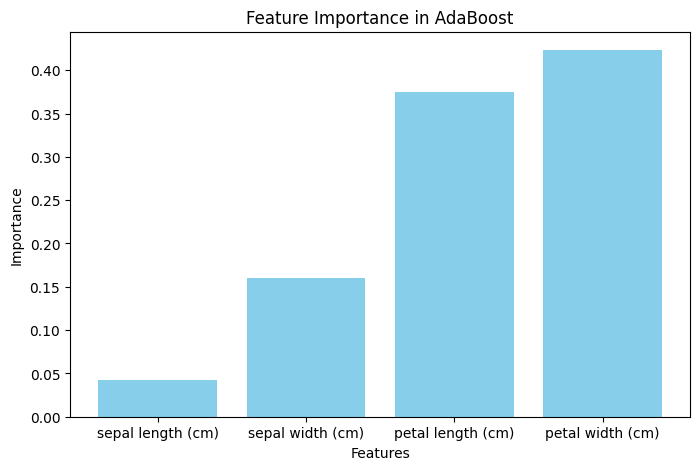

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create AdaBoost model with Decision Tree as base estimator
boosting_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Train the model
boosting_model.fit(X_train, y_train)

# Predict on test data
y_pred = boosting_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy *100 :.2f}%")

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.bar(iris.feature_names, boosting_model.feature_importances_, color='skyblue')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in AdaBoost")
plt.show()


**8b.Gradient Boosting**

**Algorithm:**

Step 1: Import required libraries (sklearn, numpy, matplotlib).

Step 2: Load the Iris dataset and extract features (X) and labels (y).

Step 3: Split the dataset into training (80%) and testing (20%) sets using train_test_split().

Step 4: Initialize the Gradient Boosting Classifier with 100 estimators, a learning rate of 0.1, and a max depth of 3.

Step 5: Train the Gradient Boosting model on the training dataset and predict labels for the test dataset.

Step 6: Evaluate the model's accuracy and plot the training loss curve to visualize model performance.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Gradient Boosting model
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Predict on test data
y_pred = gb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


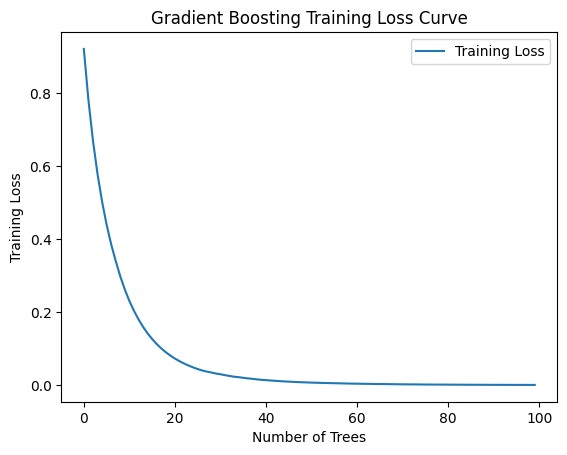

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Gradient Boosting model
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

# Plot the training loss curve
plt.plot(np.arange(len(gb_clf.train_score_)), gb_clf.train_score_, label="Training Loss")
plt.xlabel("Number of Trees")
plt.ylabel("Training Loss")
plt.title("Gradient Boosting Training Loss Curve")
plt.legend()
plt.show()


**9a. KNN model**

**Algorithm:**

Step 1: Import necessary libraries (numpy, matplotlib, sklearn).

Step 2: Load the Breast Cancer dataset and extract features (X) and labels (y).

Step 3: Split the dataset into training (80%) and testing (20%) sets using train_test_split().

Step 4: Initialize the K-Nearest Neighbors (KNN) classifier with k=5 and train it using the training dataset.

Step 5: Predict the labels for the test dataset and compute the model’s accuracy score.

Step 6: Plot the accuracy vs. k-values to visualize model performance for different k.

Model Accuracy: 95.61%


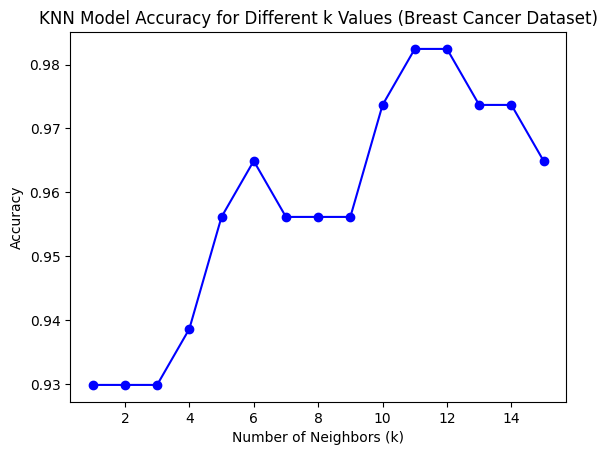

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target  # Features and labels

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")  # Accuracy in percentage format

# Plot accuracy for different values of k
k_values = range(1, 16)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy for Different k Values (Breast Cancer Dataset)')
plt.show()


**9b. K means model**

**Algorithm:**

Step 1: Import necessary libraries (numpy, matplotlib, sklearn).

Step 2: Load the Iris dataset and extract features (X).

Step 3: Apply K-Means clustering with n_clusters=3 and fit the model.

Step 4: Predict cluster labels and compute the Silhouette Score to evaluate clustering performance.

Step 5: Plot the clusters using the first two features and mark cluster centroids.

Step 6: Display the clustering results and analyze the Silhouette Score for quality assessment.

Silhouette Score: 0.5528


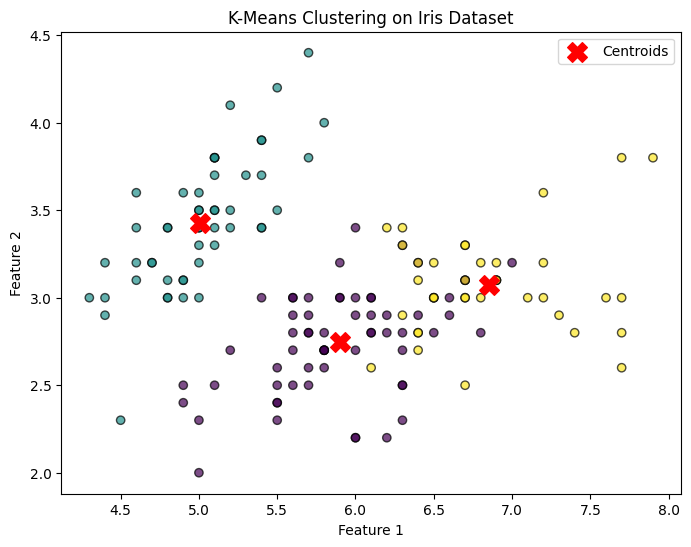

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (4D)
y_true = iris.target  # True labels (for reference)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Calculate Silhouette Score (higher is better)
sil_score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {sil_score:.4f}")

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label="Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()


**10. PCA**

**Algorithm:**

Step 1: Import required libraries (numpy, matplotlib, sklearn).

Step 2: Load the Iris dataset and extract features (X) and labels (y).

Step 3: Apply PCA to reduce 4D features to 2D (n_components=2).

Step 4: Compute and print the explained variance ratio for both principal components.

Step 5: Plot the transformed 2D data, color-coded by target class (y).

Step 6: Display the scatter plot with labeled axes and a color bar for class identification.

Explained Variance by Component 1: 92.46%
Explained Variance by Component 2: 5.31%
Total Variance Retained: 97.77%


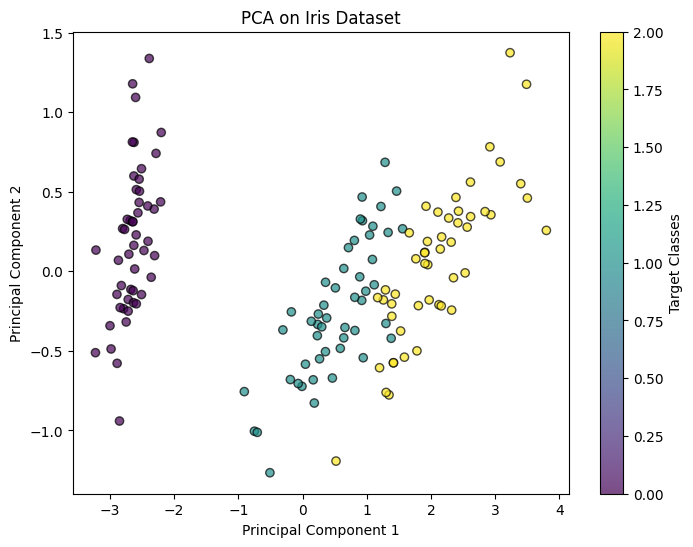

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (4D)
y = iris.target  # Labels (0,1,2)

# Apply PCA to reduce from 4D to 2D
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X)

# Print explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Component 1: {explained_variance[0]*100:.2f}%")
print(f"Explained Variance by Component 2: {explained_variance[1]*100:.2f}%")
print(f"Total Variance Retained: {sum(explained_variance)*100:.2f}%")

# Plot the reduced 2D data
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Iris Dataset")
plt.colorbar(label="Target Classes")
plt.show()


# **Wasted One**

In [ ]:
!pip install face_recognition dlib opencv-python scikit-learn

In [ ]:
!pip install face_recognition

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=66f06a52b19edacd745ed01947edf106d8b57c6f41a3a65b574cc93857706ba2
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [ ]:
!apt-get update
!apt-get install -y cmake
!apt-get install -y libboost-all-dev
!apt-get install -y libopenblas-dev liblapack-dev
!apt-get install -y libx11-dev


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [70.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,808 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,773 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease 

In [ ]:
import cv2
import face_recognition
import pickle
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Load images and encode faces
def load_faces(folder):
    X, y = [], []
    for person in os.listdir(folder):
        person_folder = os.path.join(folder, person)
        if os.path.isdir(person_folder):
            for file in os.listdir(person_folder):
                img_path = os.path.join(person_folder, file)
                img = face_recognition.load_image_file(img_path)
                encodings = face_recognition.face_encodings(img)
                if encodings:
                    X.append(encodings[0])
                    y.append(person)
    return X, y

# Train SVM Model
X, y = load_faces("/content/faces_dataset")  # Update path based on your uploaded dataset
label_encoder = LabelEncoder().fit(y)
y_enc = label_encoder.transform(y)
svm_clf = SVC(kernel="linear", probability=True).fit(X, y_enc)

# Save trained model
with open("/content/svm_model.pkl", "wb") as f:
    pickle.dump((svm_clf, label_encoder), f)

# Recognize Face Function
def recognize_face(image_path):
    with open("/content/svm_model.pkl", "rb") as f:
        svm_clf, label_encoder = pickle.load(f)

    img = face_recognition.load_image_file(image_path)
    encodings = face_recognition.face_encodings(img)

    if encodings:
        prediction = svm_clf.predict([encodings[0]])[0]
        return label_encoder.inverse_transform([prediction])[0]
    else:
        return "No face detected"

# Test with a new image
test_image_path = "/content/test_face.jpg"  # Upload a test image
print(f"Recognized Person: {recognize_face(test_image_path)}")


KeyboardInterrupt: 